In [1]:
from diy_lib.decision_tree import Decision_tree
from diy_lib.node import Node
import pandas as pd
from typing import List
from itertools import combinations
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

import sklearn as skl
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import precision_recall_fscore_support



In [2]:
test=pd.read_csv("../data/df_test.csv")
train=pd.read_csv("../data/df_train.csv")
test

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51721,12.87,3.48,1.33,73.04,0.56,8.43,0.0,0.00,1
2,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
3,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.4,0.09,7
4,1.51829,14.46,2.24,1.62,72.38,0.00,9.26,0.0,0.00,6
...,...,...,...,...,...,...,...,...,...,...
60,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
61,1.51892,13.46,3.83,1.26,72.55,0.57,8.21,0.0,0.14,2
62,1.51610,13.33,3.53,1.34,72.67,0.56,8.33,0.0,0.00,3
63,1.51730,12.35,2.72,1.63,72.87,0.70,9.23,0.0,0.00,2


In [3]:
set(train['type'])

{1, 2, 3, 5, 6, 7}

In [4]:
#to do
#max depth for tree

In [5]:
T = Decision_tree(depth = 3, min_samples_split = 15)
T.fit(train)
T.score(test)

0.7538461538461538

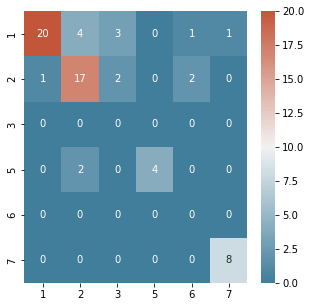

In [6]:
T.score_matix(test)

In [7]:
T.evaluation(test)

Accuracy: 0.7538461538461538
Recall: 0.5967333793420749
F1-Score: 0.5494553376906318


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
def k_fold(data, sets):
    np.random.seed(42)
    data_dict = {}
    for s in range(sets):
        data = shuffle(data)
        test = pd.DataFrame()
        train = pd.DataFrame()
        for c in set(data['type']):
            class_c = data.loc[data['type'] == c]
            test_c = class_c.head(int(len(class_c)*(0.7)))
            train_c = class_c.iloc[len(test_c):]
            test = pd.concat([test, test_c])
            train = pd.concat([train, train_c])
        data_dict[s] = train, test
    return data_dict


def grid_k_fold(data, depths, samples, num_fold):
    cross_list = []
    dic = k_fold(data, num_fold)
    for depth in depths:
        hall_of_fame = []
        for sample in samples:
            best = 0
            for sets in range(num_fold):
                train, test = dic[sets]
                T = Decision_tree(depth = depth, min_samples_split = sample)
                x = T.fit(train)
                score = T.score(test)
                best += score
            hall_of_fame.append(best/num_fold)
        cross_list.append(hall_of_fame)
    return pd.DataFrame(cross_list)

In [9]:
d = [2,3,5,8,9,10,12,15]
s = [2,4,6,8,10,15]

grid = grid_k_fold(train, d, s, 5) #(row = depth, column = min sample split)

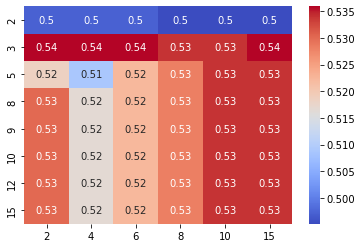

In [10]:
sns.heatmap(grid, annot = True, cmap= "coolwarm", xticklabels = s, yticklabels = d) #x-axis = sample, y-axis = depth
plt.savefig('grid_k_fold.png')

In [5]:
T = Decision_tree(depth = 3, min_samples_split = 2)
T.fit(train)

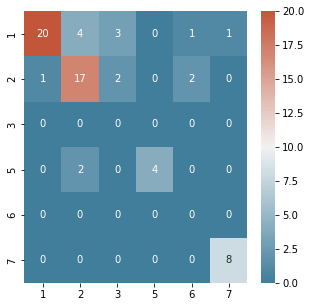

In [12]:
T.score_matix(test)

In [13]:
T.evaluation(test)

Accuracy: 0.7538461538461538
Recall: 0.5967333793420749
F1-Score: 0.5494553376906318


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Reference (same hyperparameters)

In [6]:
trainY, trainX = train['type'], train.loc[:, train.columns != 'type']
testY, testX = test['type'], test.loc[:, test.columns != 'type']

In [7]:
rDT = DecisionTreeClassifier(criterion='gini', 
                             splitter='best', 
                             max_depth=3, 
                             min_samples_split=2,   
                             random_state= 42)
rDT.fit(trainX, trainY)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [8]:
y_pred = rDT.predict(test.loc[:, test.columns != 'type'])
y_true = test['type']

precision, recall, fscore, supporty = precision_recall_fscore_support(y_true, y_pred, average='macro')
acc = skl.metrics.accuracy_score(y_true, y_pred)

print('recall:', recall,
'F1-Score:', fscore,
'Accuracy:', acc)

recall: 0.5967333793420749 F1-Score: 0.5494553376906318 Accuracy: 0.7538461538461538


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Reference (optimized hyperparameters)

In [11]:
trainY, trainX = train['type'], train.loc[:, train.columns != 'type']
testY, testX = test['type'], test.loc[:, test.columns != 'type']

In [16]:
parameters = {'criterion': ['gini', 'entropy'],
             'max_depth': [2,3,4,5,6,7,8,9,10,15,20,25],
              'min_samples_split': [2,4,6,8,10,12,14]}

op_dt = DecisionTreeClassifier(random_state=42)
op_dt = GridSearchCV(op_dt, parameters)
op_dt.fit(trainX, trainY)
sorted(op_dt.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_criterion',
 'param_max_depth',
 'param_min_samples_split',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [17]:
op_dt.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 8}

In [18]:
op_dt = DecisionTreeClassifier(criterion='entropy', 
                             splitter='best', 
                             max_depth=6, 
                             min_samples_split=8,   
                             random_state= 42)
op_dt.fit(trainX, trainY)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=8,
                       random_state=42)

In [19]:
y_pred = op_dt.predict(test.loc[:, test.columns != 'type'])
y_true = test['type']

precision, recall, fscore, supporty = precision_recall_fscore_support(y_true, y_pred, average='macro')
acc = skl.metrics.accuracy_score(y_true, y_pred)

print('recall:', recall,
'F1-Score:', fscore,
'Accuracy:', acc)

recall: 0.686887508626639 F1-Score: 0.7076486150015562 Accuracy: 0.7384615384615385


## Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100,
                            criterion = 'gini', 
                            max_depth = 5, 
                            min_samples_split = 2,
                            bootstrap = True)

trainY, trainX = train['type'], train.loc[:, train.columns != 'type']
testY, testX = test['type'], test.loc[:, test.columns != 'type']

RF.fit(trainX, trainY)

RandomForestClassifier(max_depth=5)

In [15]:
RF.score(testX, testY)

0.8153846153846154

In [16]:
parameters = {'n_estimators': [40,41,43,45,47,49,50],
              'criterion': ['gini', 'entropy'],
             'max_depth': [15,16,17,18,19,20],
              'min_samples_split': [2,4,6,8,10,12,14],
              'bootstrap': [True]}

random_forest = RandomForestClassifier(random_state=42)
random_forest = GridSearchCV(random_forest, parameters)
random_forest.fit(trainX, trainY)
sorted(random_forest.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_bootstrap',
 'param_criterion',
 'param_max_depth',
 'param_min_samples_split',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [17]:
random_forest.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 15,
 'min_samples_split': 6,
 'n_estimators': 41}

In [18]:
op_rf = RandomForestClassifier(n_estimators=41,
                               criterion = 'gini', 
                               max_depth = 15, 
                               min_samples_split = 6,
                               bootstrap = True,
                               random_state=42)


op_rf.fit(trainX, trainY)
op_rf.score(testX, testY)

0.8307692307692308

In [21]:
precision_recall_fscore_support(y_true, y_pred, average='macro')

(0.6775793650793651, 0.77789279963193, 0.7144139409471074, None)

In [22]:
#recall = 77.79%
#F1-Score = 71.44%
#Accuracy = 83.08%
skl.metrics.accuracy_score(y_true, y_pred)

0.8307692307692308

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=58866f15-1cff-4fef-9525-5c3070562370' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>